In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [256]:
df = pd.read_csv('dataset.zip')
df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


Data Cleaning

In [258]:
print(df.isnull().sum())  
df.dropna(inplace=True)  

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64


In [259]:
df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


Mengubah Format Data (Waktu)

In [260]:
df['Order_Time'] = pd.to_datetime(df['Order_Time'], errors='coerce').dt.hour
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], errors='coerce').dt.hour

Rata-rata waktu pengiriman berdasarkan kendaraan

In [261]:
avg_delivery_time = df.groupby("Vehicle")["Delivery_Time"].mean().reset_index()
print(avg_delivery_time)


       Vehicle  Delivery_Time
0  motorcycle      131.028172
1     scooter      116.356477
2          van     116.140421


 Distribusi keterlambatan berdasarkan cuaca & lalu lintas

In [262]:
delay_analysis = df.groupby(["Weather", "Traffic"])["Delivery_Time"].mean().reset_index()
print(delay_analysis)

       Weather  Traffic  Delivery_Time
0       Cloudy    High      138.900838
1       Cloudy     Jam      174.682884
2       Cloudy     Low      106.661246
3       Cloudy  Medium      136.680720
4          Fog    High      134.935271
5          Fog     Jam      174.162437
6          Fog     Low      104.924513
7          Fog  Medium      132.223706
8   Sandstorms    High      131.856932
9   Sandstorms     Jam      142.284233
10  Sandstorms     Low       96.740564
11  Sandstorms  Medium      132.818287
12      Stormy    High      131.917251
13      Stormy     Jam      142.269708
14      Stormy     Low       98.561041
15      Stormy  Medium      131.774411
16       Sunny    High      110.197203
17       Sunny     Jam      108.654260
18       Sunny     Low      102.572799
19       Sunny  Medium       95.959420
20       Windy    High      128.727273
21       Windy     Jam      142.866784
22       Windy     Low       98.702198
23       Windy  Medium      130.673322


Encode variabel kategorikal

In [263]:
label_encoders = {}
categorical_cols = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Analisis Data Eksploratif

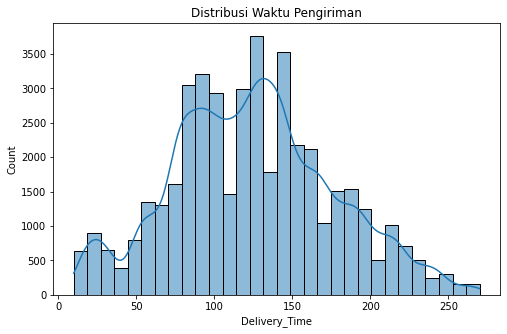

In [264]:
plt.figure(figsize=(8,5))
sns.histplot(df['Delivery_Time'], bins=30, kde=True)
plt.title("Distribusi Waktu Pengiriman")
plt.show()

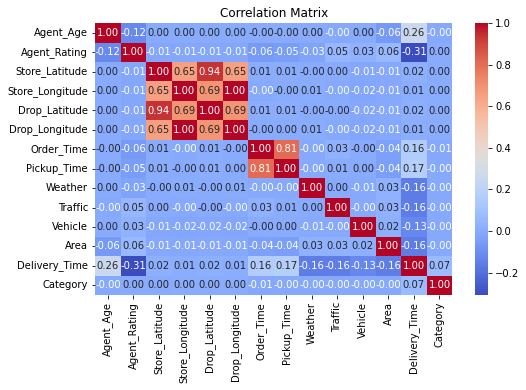

In [265]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

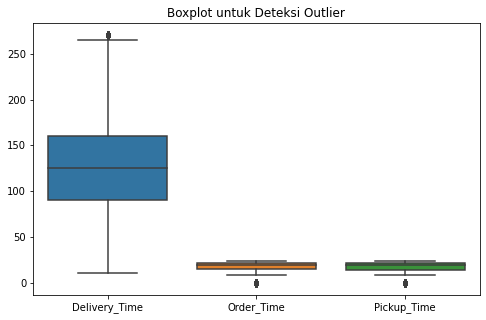

In [266]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Delivery_Time', 'Order_Time', 'Pickup_Time']])
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()

Category Counts:
4     2841
1     2813
7     2793
15    2771
12    2764
13    2762
9     2739
0     2718
14    2708
5     2687
10    2679
6     2678
3     2666
8     2663
2     2657
11    2655
Name: Category, dtype: int64


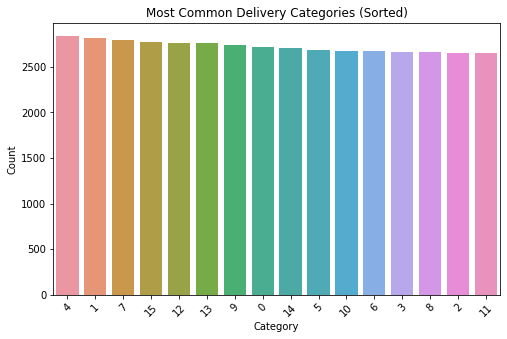

In [267]:
# Menghitung jumlah tiap kategori
category_counts = df['Category'].value_counts()

# Menampilkan hasil dalam bentuk tabel
print("Category Counts:")
print(category_counts)


# Menampilkan visualisasi dengan urutan dari yang terbanyak
plt.figure(figsize=(8,5))
sns.barplot(x=category_counts.index, y=category_counts.values, order=category_counts.index)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Most Common Delivery Categories (Sorted)')
plt.xticks(rotation=45)
plt.show()


Category
3     132.935109
8     132.360120
14    132.309823
12    132.098408
0     132.001472
13    131.911658
10    131.351250
11    131.154426
9     131.153706
1     131.062922
6     130.939134
4     130.869412
7     130.775152
2     130.474219
15    129.366655
5      26.543357
Name: Delivery_Time, dtype: float64
ANOVA Test p-value: 0.0


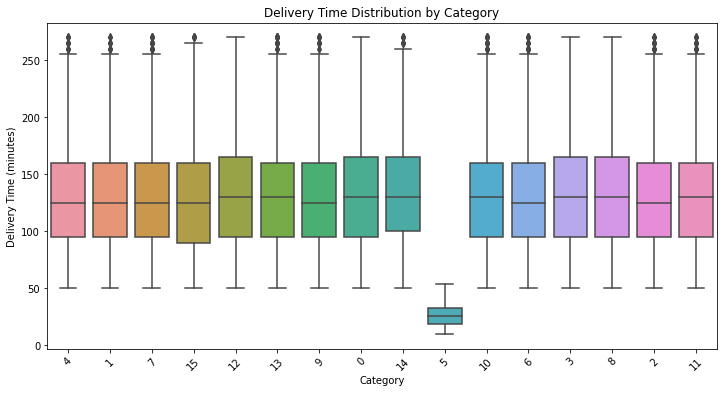

In [268]:
category_avg_time = df.groupby('Category')['Delivery_Time'].mean().sort_values(ascending=False)
print(category_avg_time)

from scipy.stats import f_oneway, kruskal

categories = [df[df['Category'] == cat]['Delivery_Time'] for cat in df['Category'].unique()]
anova_result = f_oneway(*categories)
print("ANOVA Test p-value:", anova_result.pvalue)


plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Category', y='Delivery_Time', order=category_counts.index)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Delivery Time (minutes)')
plt.title('Delivery Time Distribution by Category')
plt.show()


Prediksi Keterlambatan

In [269]:
df['Late'] = df['Delivery_Time'].apply(lambda x: 1 if x > 30 else 0)
features = ['Agent_Age', 'Agent_Rating', 'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area', 'Category']
X = df[features]
y = df['Late']

Standarisasi

In [270]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [272]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Evaluasi Model

In [273]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9942653974079596
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       360
           1       1.00      1.00      1.00      8359

    accuracy                           0.99      8719
   macro avg       0.96      0.97      0.96      8719
weighted avg       0.99      0.99      0.99      8719

Confusion Matrix:
[[ 343   17]
 [  33 8326]]


Export

In [274]:
# Mengembalikan data kategorikal ke format aslinya
for col in categorical_cols:
    df[col] = label_encoders[col].inverse_transform(df[col])

# Cek hasilnya
print(df.head())


        Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  zguw716275638         32           4.6       12.972793        80.249982   

   Drop_Latitude  Drop_Longitude  Order_Date  Order_Time  Pickup_Time  \
0      22.765049       75.912471  2022-03-19          11           11   
1      13.043041       77.813237  2022-03-25          19           19   
2      12.924264       77.688400  2022-03-19           8            8   
3      11.053669       77.026494  2022-04-05          18           18   
4      13.012793       80.289982  2022-03-26          13           13   

      Weather  Traffic      Vehicle            Area  Delivery_Time  \
0       Sunny    High 

In [276]:
# Ubah nilai numerik ke kategori
df['Late'] = df['Late'].map({0: 'Tepat Waktu', 1: 'Terlambat'})

# Cek hasil perubahan
print(df['Late'].value_counts())


Terlambat      41745
Tepat Waktu     1849
Name: Late, dtype: int64


In [278]:
df.to_csv("Dataset.csv", index=False)